In [2]:
!pip install statsmodels

In [4]:
import pandas as pd

data = {'x': [1,2,3,4,5], 'y':[1,3,4,6,5]}
df = pd.DataFrame(data)

df

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


In [5]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula='y ~ x', data=df).fit()  # y ~ x : y = ax + b

In [7]:
lm_model.params  # intercept : y절편 , x : 기울기

Intercept    0.5
x            1.1
dtype: float64

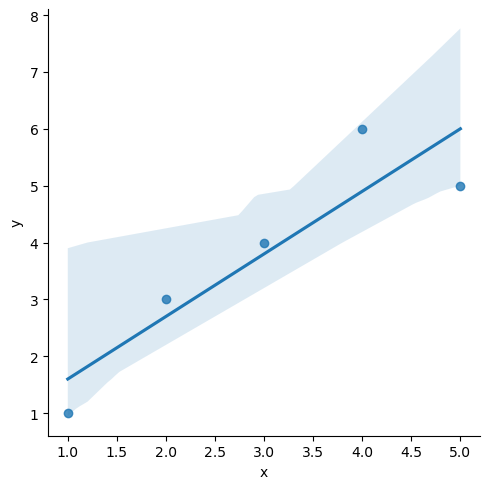

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='x', y='y', data=df);

### 잔차 평가 residue
- 잔차 : 내 모델과 실제값과의 차이
- 잔차는 평균이 0인 정규분포를 따르는 것이어야 한다
- 잔차 평가는 평균이 0이고 정규분포를 따르는지 확인

In [15]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

### 결정계수 R-Squared = ssR/ssT
- y-hat은 예측된 값
- 예측값과 실제값(y)이 일치하면 결정계수는 1이 됨(즉 결정계수가 높을수록 좋은 모델)

In [16]:
import numpy as np

mu = np.mean(df['y'])
y = df['y']

y_hat = lm_model.predict()
np.sum((y_hat-mu)**2) / np.sum((y-mu)**2)

0.8175675675675674

In [17]:
# 위의 과정 간단하게

lm_model.rsquared

0.8175675675675675

/var/folders/c6/471s425j3qxdj2hh7ryngzk40000gn/T/ipykernel_365/65180061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid, color='black')


<AxesSubplot: ylabel='Density'>

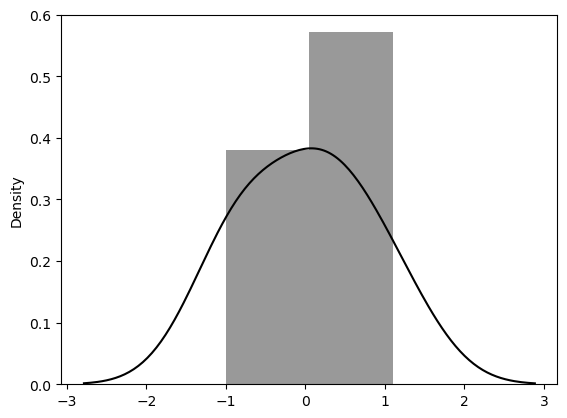

In [18]:
sns.distplot(resid, color='black')